# ARMA complements
#### Friday session

In [5]:
library("forecast")
library("caschrono")
library("tseries")
library("astsa")
library("ltsa")
library("expsmooth")
library("timeSeries")
library("fma")
library("WaveletComp")
library(TSA)
library(arfima)
library(fracdiff)
library(vars)


Attaching package: ‘fma’

The following objects are masked from ‘package:astsa’:

    chicken, sales

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast

Attaching package: ‘TSA’

The following objects are masked from ‘package:timeDate’:

    kurtosis, skewness

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Note that the arfima package has new defaults starting with
1.4-0: type arfimachanges() for a list, as well as some other notes.
NOTE: some of these are quite important!

Attaching package: ‘arfima’

The following object is masked from ‘package:forecast’:

    arfima

The following object is masked from ‘package:stats’:

    BIC

Loading required package: MASS

Attaching package: ‘MASS’

The following objects are masked from ‘package:fma’:

    cement, housing, petrol

Loading required package: strucchange
Loading required package

In [49]:
options(repr.plot.width=6, repr.plot.height=6, cex = 0.3)

###  long memory fractional differentiated time series

In [6]:
# example cours
lvarve<- log(varve)  # could use also Box-Cox transformation

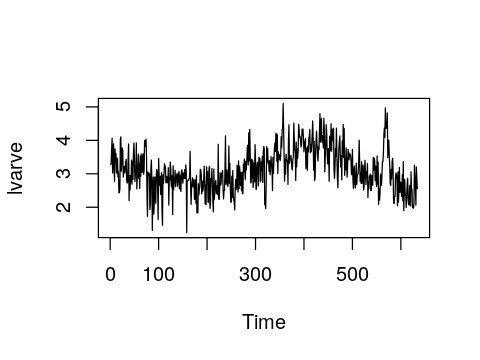

In [19]:
plot(lvarve,type="l")

ACF,PACF
"0,59","0,59"
"0,51","0,24"
"0,46","0,15"
"0,46","0,16"
"0,46","0,13"
"0,46","0,11"
"0,43","0,05"
"0,43","0,08"
"0,41","0,02"
"0,37","-0,02"


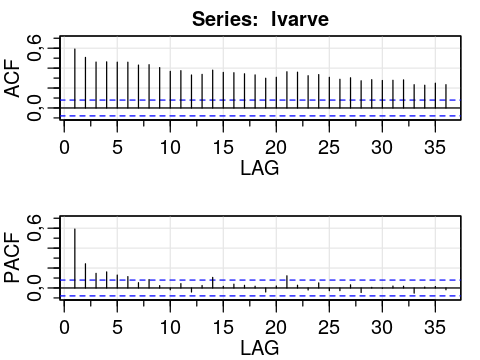

In [21]:
acf2(lvarve)  # ACF appears slow decreasing

In [22]:
fr_lvarve<-arfima(lvarve)   
fr_lvarve #d.f 0,372789 #is the derivative exponent

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.



Number of modes: 1 

Call:
arfima(z = lvarve)

Coefficients for fits:
             Coef.1:    SE.1:     
d.f           0,372789   0,0273455
Fitted mean   3,08141    0,264642 
logl          466,028             
sigma^2       0,229718            
Starred fits are close to invertibility/stationarity boundaries

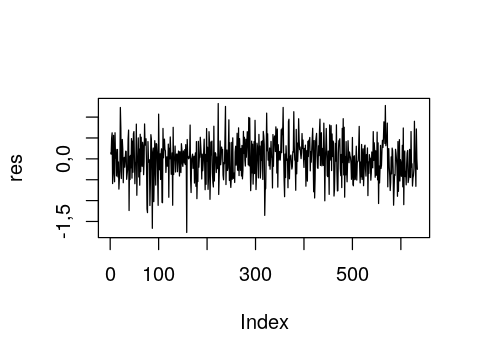

In [23]:
res<- residuals(fr_lvarve)[[1]]  
plot(res,type="l")

ACF,PACF
"-0,03","-0,03"
"-0,01","-0,01"
"-0,04","-0,04"
"0,02","0,02"
"0,04","0,04"
"0,06","0,07"
"0,01","0,02"
"0,06","0,07"
"0,03","0,04"
"-0,02","-0,02"


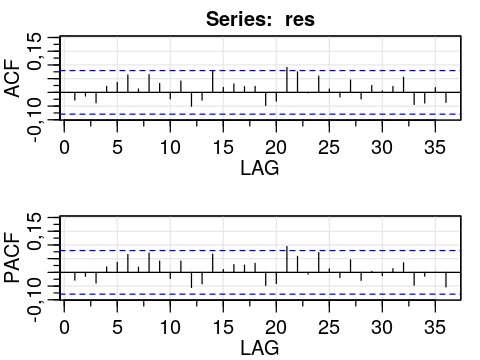

In [24]:
acf2(res)

---

## ARMAX model:
you can put a regresssion part in the model with exogeneous inputs


ACF,PACF
"0,76","0,76"
"0,46","-0,28"
"0,26","0,05"
"0,14","-0,01"
"0,08","0,02"
"0,03","-0,05"
"0,02","0,06"
"0,05","0,06"
"0,09","0,03"
"0,02","-0,21"


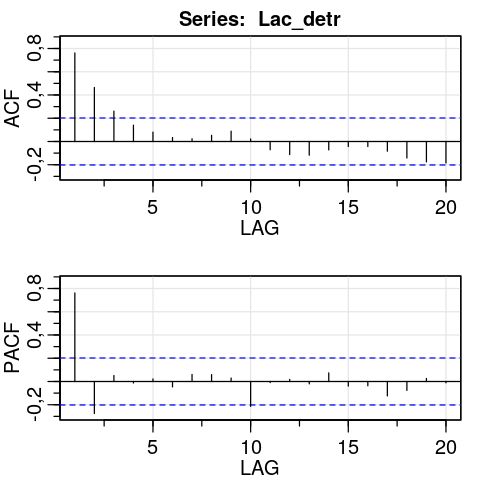

ACF,PACF
"0,02","0,02"
"-0,03","-0,03"
"0,00","0,00"
"0,04","0,04"
"0,05","0,05"
"-0,01","-0,01"
"-0,03","-0,03"
"-0,04","-0,04"
"0,17","0,16"
"-0,01","-0,02"


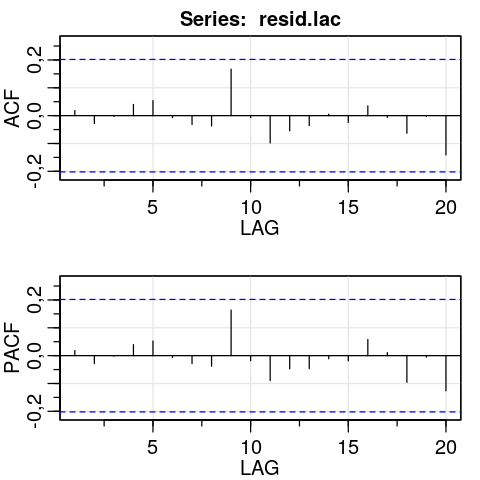

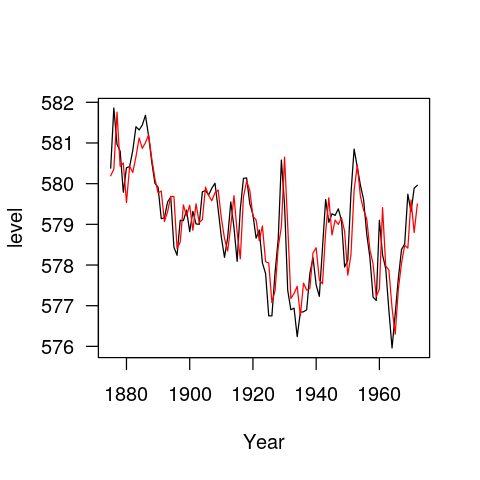

In [36]:
# regression with simple exogeneous inputs

temp_lh<- time(LakeHuron) - 1920
Lac_detr<- LakeHuron -fitted(lm(LakeHuron~temp_lh))
acf2(Lac_detr)

mod.lac<- Arima(LakeHuron, order = c(2,0,0), xreg = temp_lh)

yhat<- fitted(mod.lac)
resid.lac<- residuals(mod.lac)
acf2(resid.lac)
plot.ts(cbind(LakeHuron,yhat),lty=1,las=1,
        plot.type="single", ylab="level",xlab="Year",col=c("black","red"))

In [29]:
# regression with simple exogeneous input and other time series
trend  = time(cmort) 
temp   = tempr - mean(tempr)
temp2  = temp^2
summary(fit <- lm(cmort~trend + temp + temp2 + part, na.action=NULL))

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = cmort ~ trend + temp + temp2 + part, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-19,0760  -4,2153  -0,4878   3,7435  29,2448 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2,831e+03  1,996e+02   14,19  < 2e-16 ***
trend       -1,396e+00  1,010e-01  -13,82  < 2e-16 ***
temp        -4,725e-01  3,162e-02  -14,94  < 2e-16 ***
temp2        2,259e-02  2,827e-03    7,99 9,26e-15 ***
part         2,554e-01  1,886e-02   13,54  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 6,385 on 503 degrees of freedom
Multiple R-squared:  0,5954,	Adjusted R-squared:  0,5922 
F-statistic:   185 on 4 and 503 DF,  p-value: < 2,2e-16


ACF,PACF
"0,34","0,34"
"0,44","0,36"
"0,28","0,08"
"0,28","0,06"
"0,16","-0,05"
"0,12","-0,05"
"0,07","-0,02"
"0,01","-0,05"
"0,03","0,02"
"-0,05","-0,06"


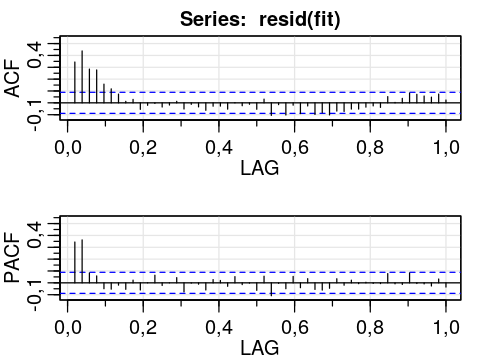

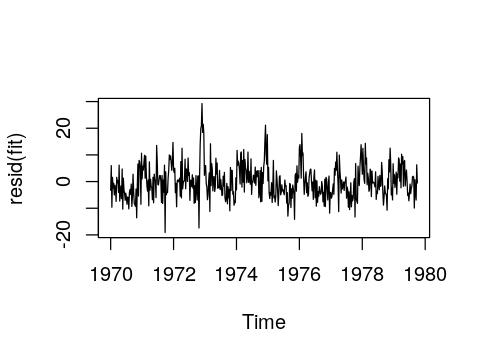

In [30]:
acf2(resid(fit), 52) # implies AR2
#stats::acf2(resid(fit), 52) # if the previous doesn't work
plot(resid(fit),type="l")

initial  value 1,849900 
iter   2 value 1,733730
iter   3 value 1,701063
iter   4 value 1,682463
iter   5 value 1,657377
iter   6 value 1,652444
iter   7 value 1,641726
iter   8 value 1,635302
iter   9 value 1,630848
iter  10 value 1,629286
iter  11 value 1,628731
iter  12 value 1,628646
iter  13 value 1,628634
iter  14 value 1,628633
iter  15 value 1,628632
iter  16 value 1,628628
iter  17 value 1,628627
iter  18 value 1,628627
iter  19 value 1,628626
iter  20 value 1,628625
iter  21 value 1,628622
iter  22 value 1,628618
iter  23 value 1,628614
iter  24 value 1,628612
iter  25 value 1,628611
iter  26 value 1,628610
iter  27 value 1,628610
iter  28 value 1,628609
iter  29 value 1,628609
iter  30 value 1,628608
iter  31 value 1,628608
iter  32 value 1,628608
iter  32 value 1,628608
iter  32 value 1,628608
final  value 1,628608 
converged
initial  value 1,630401 
iter   2 value 1,630393
iter   3 value 1,630382
iter   4 value 1,630381
iter   5 value 1,630375
iter   6 value 1,630370
iter 

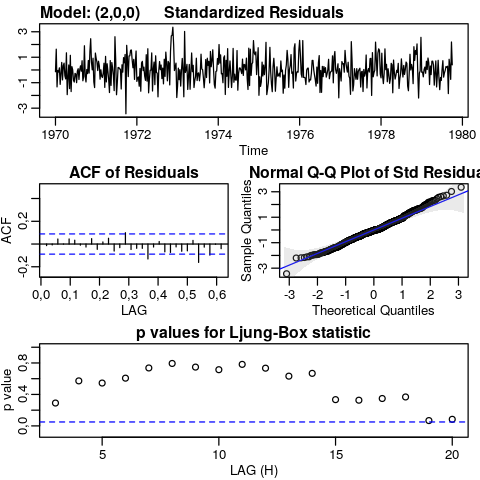

In [33]:
fit_armax<-sarima(cmort, 2,0,0, xreg=cbind(trend,temp,temp2,part) )
res2<- resid(fit_armax$fit)
res2ts<- ts(res2)

ACF,PACF
"-0,01","-0,01"
"-0,01","-0,01"
"0,04","0,04"
"0,00","0,00"
"0,04","0,05"
"0,03","0,03"
"-0,01","-0,01"
"-0,03","-0,03"
"0,05","0,04"
"-0,05","-0,05"


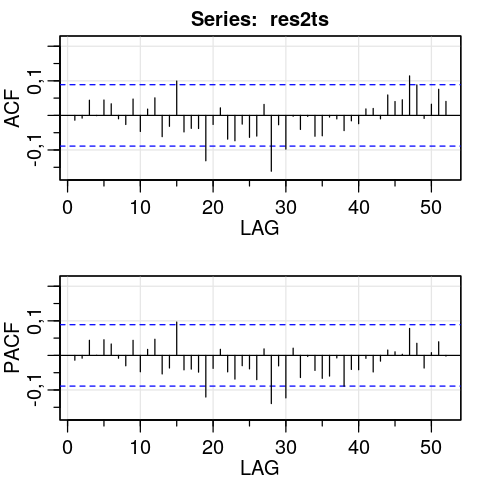

In [37]:
acf2(res2ts,52)

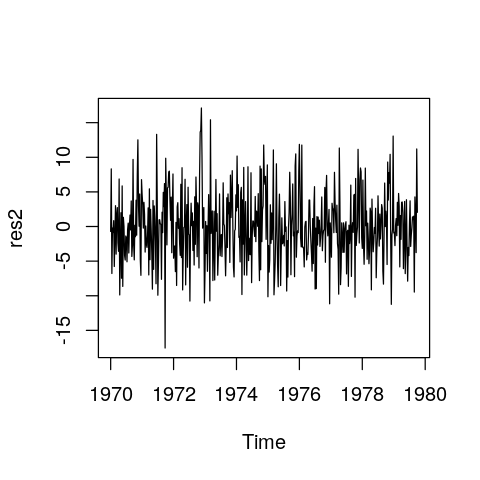

In [38]:
plot(res2,type="l")

In [39]:
Box.test(res2,lag=15,type="Box-Pierce",fitdf=2)


	Box-Pierce test

data:  res2
X-squared = 14,207, df = 13, p-value = 0,3594


## Vector autoregressive model


In [40]:
# First adjust a VAR(1) model with a linear trend (type ="both)
x = cbind(cmort, tempr, part)
summary(VAR(x, p=1, type="both"))  # "both" fits constant + trend


Warning message in printCoefmat(result$coef, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”Warning message in printCoefmat(result$coef, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”Warning message in printCoefmat(result$coef, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


VAR Estimation Results:
Endogenous variables: cmort, tempr, part 
Deterministic variables: both 
Sample size: 507 
Log Likelihood: -5116,02 
Roots of the characteristic polynomial:
0,8931 0,4953 0,1444
Call:
VAR(y = x, p = 1, type = "both")


Estimation results for equation cmort: 
cmort = cmort.l1 + tempr.l1 + part.l1 + const + trend 

          Estimate Std. Error t value Pr(>|t|)    
cmort.l1  0,464824   0,036729  12,656  < 2e-16 ***
tempr.l1 -0,360888   0,032188 -11,212  < 2e-16 ***
part.l1   0,099415   0,019178   5,184 3,16e-07 ***
const    73,227292   4,834004  15,148  < 2e-16 ***
trend    -0,014459   0,001978  -7,308 1,07e-12 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1


Residual standard error: 5,583 on 502 degrees of freedom
Multiple R-Squared: 0,6908,	Adjusted R-squared: 0,6883 
F-statistic: 280,3 on 4 and 502 DF,  p-value: < 2,2e-16 


Estimation results for equation tempr: 
tempr = cmort.l1 + tempr.l1 + part.l1 + const + trend 

          Estimat

In [41]:
# compare several information criteria to choose the VAR order
# with still a linear trend
# Below we choose p=2 as suggested by BIC 
VARselect(x, lag.max=10, type="both")

,1,2,3,4,5,6,7,8,9,10
AIC(n),"11,73780","11,30185","11,26788","11,23030","11,17634","11,15266","11,15247","11,12878","11,11915","11,12019"
HQ(n),"11,78758","11,38149","11,37738","11,36967","11,34557","11,35176","11,38144","11,38760","11,40784","11,43874"
SC(n),"11,86463","11,50477","11,54689","11,58541","11,60755","11,65996","11,73587","11,78827","11,85473","11,93187"
FPE(n),"125216,91717","80972,28678","78268,19568","75383,73647","71426,10041","69758,25113","69749,89175","68122,40518","67476,96374","67556,45243"


Warning message in printCoefmat(result$coef, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”Warning message in printCoefmat(result$coef, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”Warning message in printCoefmat(result$coef, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


VAR Estimation Results:
Endogenous variables: cmort, tempr, part 
Deterministic variables: both 
Sample size: 506 
Log Likelihood: -4987,186 
Roots of the characteristic polynomial:
0,8807 0,8807 0,5466 0,4746 0,4746 0,4498
Call:
VAR(y = x, p = 2, type = "both")


Estimation results for equation cmort: 
cmort = cmort.l1 + tempr.l1 + part.l1 + cmort.l2 + tempr.l2 + part.l2 + const + trend 

          Estimate Std. Error t value Pr(>|t|)    
cmort.l1  0,297059   0,043734   6,792 3,15e-11 ***
tempr.l1 -0,199510   0,044274  -4,506 8,23e-06 ***
part.l1   0,042523   0,024034   1,769  0,07745 .  
cmort.l2  0,276194   0,041938   6,586 1,15e-10 ***
tempr.l2 -0,079337   0,044679  -1,776  0,07639 .  
part.l2   0,068082   0,025286   2,692  0,00733 ** 
const    56,098652   5,916618   9,482  < 2e-16 ***
trend    -0,011042   0,001992  -5,543 4,84e-08 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1


Residual standard error: 5,295 on 498 degrees of freedom
Multiple R-Squared: 0

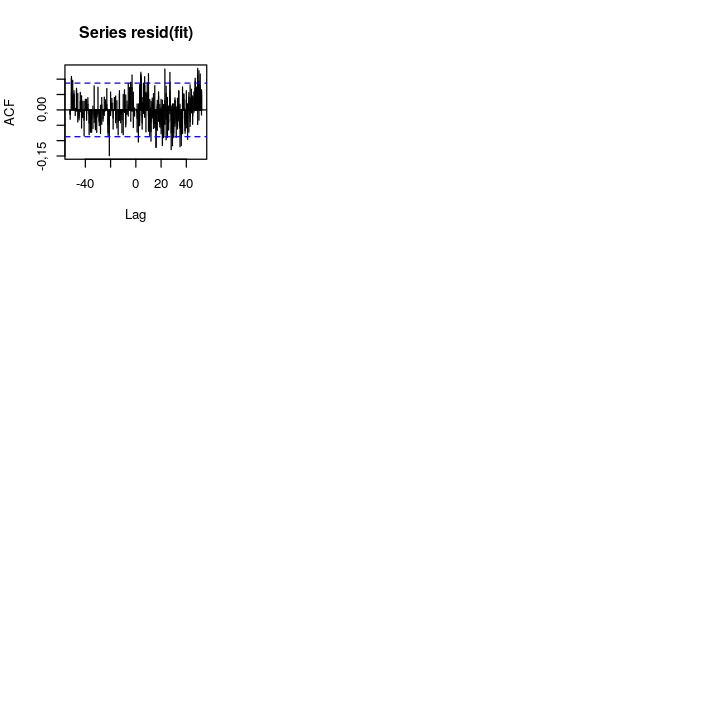

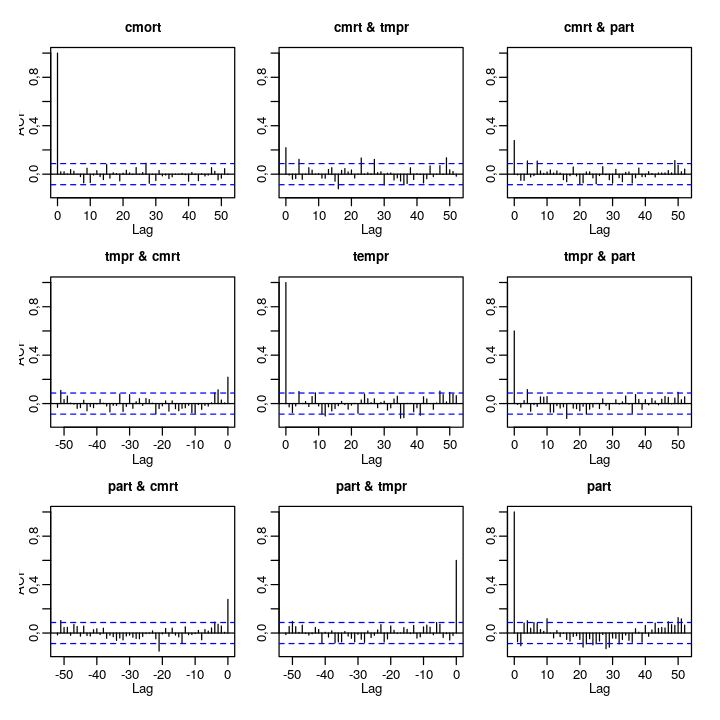

In [54]:
summary(fit <- VAR(x, p=2, type="both"))
#dev.new()
par(mfrow=c(3,3))
acf(resid(fit), 52)
stats::acf(resid(fit), 52)

In [47]:
serial.test(fit, lags.pt=12, type="PT.adjusted")


	Portmanteau Test (adjusted)

data:  Residuals of VAR object fit
Chi-squared = 162,35, df = 90, p-value = 4,602e-06

$serial

	Portmanteau Test (adjusted)

data:  Residuals of VAR object fit
Chi-squared = 162,35, df = 90, p-value = 4,602e-06



$cmort
           fcst    lower     upper       CI
  [1,] 87,26921 76,89173  97,64668 10,37748
  [2,] 87,02842 76,09665  97,96020 10,93178
  [3,] 87,29573 75,40528  99,18618 11,89045
  [4,] 87,32528 74,90938  99,74119 12,41591
  [5,] 87,28237 74,33199 100,23275 12,95038
  [6,] 87,17621 73,74964 100,60277 13,42657
  [7,] 87,00116 73,11597 100,88634 13,88519
  [8,] 86,78430 72,46755 101,10104 14,31674
  [9,] 86,53258 71,81185 101,25330 14,72073
 [10,] 86,25716 71,16321 101,35111 15,09395
 [11,] 85,96792 70,53387 101,40197 15,43405
 [12,] 85,67068 69,93014 101,41121 15,74053
 [13,] 85,37231 69,35882 101,38580 16,01349
 [14,] 85,07662 68,82233 101,33091 16,25429
 [15,] 84,78756 68,32281 101,25230 16,46474
 [16,] 84,50751 67,86030 101,15472 16,64721
 [17,] 84,23850 67,43429 101,04272 16,80422
 [18,] 83,98179 67,04340 100,92019 16,93840
 [19,] 83,73823 66,68589 100,79057 17,05234
 [20,] 83,50824 66,35971 100,65678 17,14853
 [21,] 83,29196 66,06268 100,52125 17,22929
 [22,] 83,08928 65,79254 

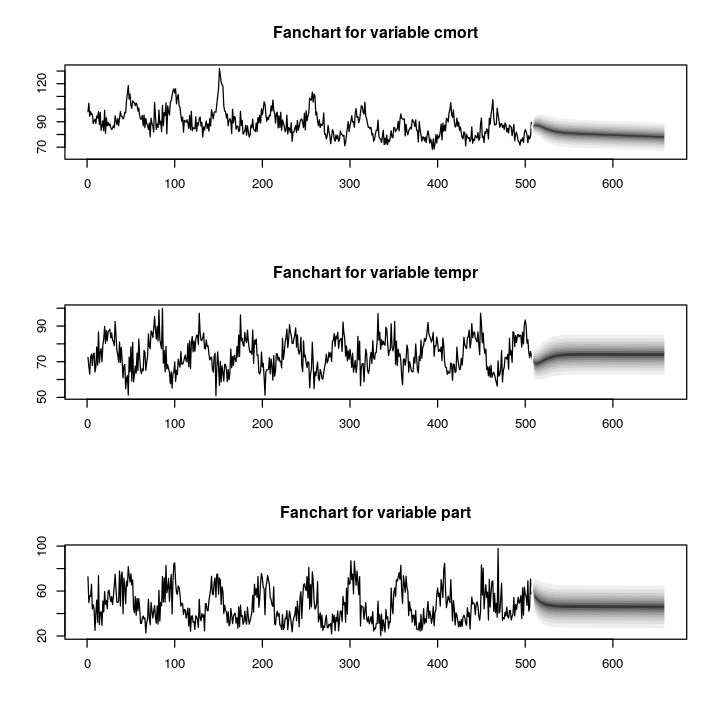

In [53]:
(fit.pr = predict(fit, n.ahead = 150, ci = 0.95))  # 4 weeks ahead
# dev.new()
fanchart(fit.pr)  # plot prediction + error